In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.shape

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [ ]:
pd.DataFrame(
    df.groupby(
        by='campaign'
    )['conversion'].sum()
)

,conversion
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


In [ ]:
pd.DataFrame(
    df.groupby(
        by='campaign'
    )['conversion'].count()
)

,conversion
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


In [ ]:
conversions_by_contacts = df.groupby(
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100.0
pd.DataFrame(conversions_by_contacts)

,conversion
campaign,
1,13.037071
2,11.456954
3,10.747051
4,9.392682
5,7.504690
6,7.660878
7,6.041335
8,4.250000
9,6.007067


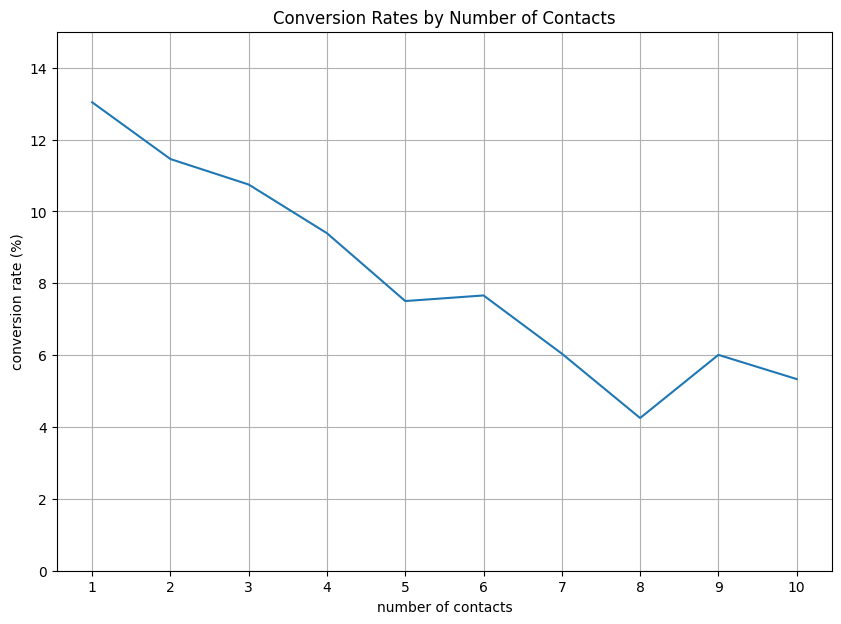

In [ ]:
ax = conversions_by_contacts[:10].plot(
    grid=True,
    figsize=(10, 7),
    xticks=conversions_by_contacts.index[:10],
    title='Conversion Rates by Number of Contacts'
)

ax.set_ylim([0, 15])
ax.set_xlabel('number of contacts')
ax.set_ylabel('conversion rate (%)')

plt.show()

In [ ]:
pd.DataFrame(
    df.groupby(
        by='age'
    )['conversion'].count()
)

,conversion
age,
17,5
18,28
19,42
20,65
21,102
...,...
91,2
92,4
94,1


In [ ]:
conversions_by_age = df.groupby(
    by='age'
)['conversion'].sum() / df.groupby(
    by='age'
)['conversion'].count() * 100.0
pd.DataFrame(conversions_by_age)

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
...,...
91,0.000000
92,75.000000
94,0.000000


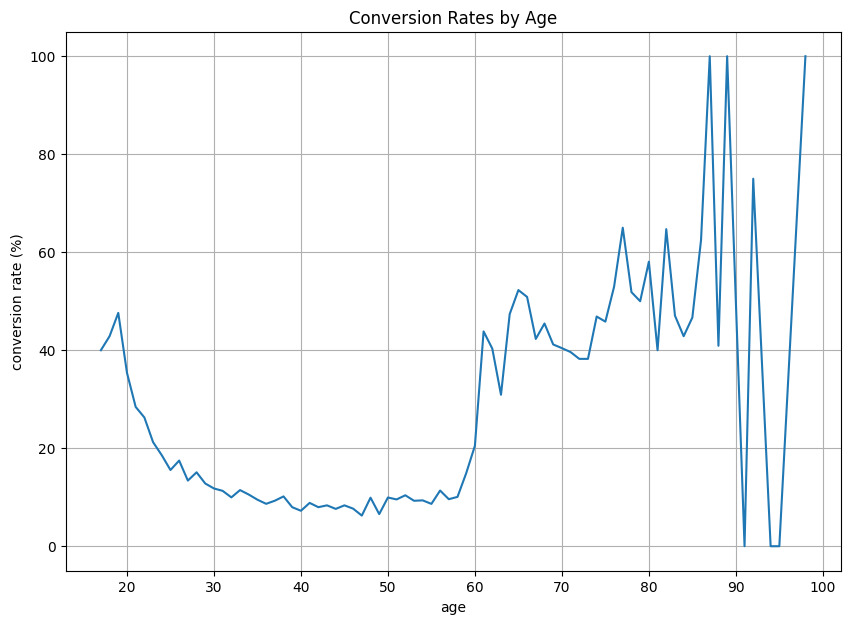

In [ ]:
ax = conversions_by_age.plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

In [ ]:
df['age_group'] = df['age'].apply(
    lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
        else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
        else '[60, 70)' if x < 70 else '70+'
)

In [ ]:
pd.DataFrame(
    df.groupby(
        by='age_group'
    )['conversion'].sum()
)

,conversion
age_group,
70+,221
"[18, 30)",922
"[30, 40)",1715
"[40, 50)",834
"[50, 60)",697
"[60, 70)",251


In [ ]:
pd.DataFrame(
    df.groupby(
        by='age_group'
    )['conversion'].count()
)

,conversion
age_group,
70+,469
"[18, 30)",5669
"[30, 40)",16938
"[40, 50)",10526
"[50, 60)",6862
"[60, 70)",724


In [ ]:
conversions_by_age_group = df.groupby(
    by='age_group'
)['conversion'].sum() / df.groupby(
    by='age_group'
)['conversion'].count() * 100.0
pd.DataFrame(conversions_by_age_group)

,conversion
age_group,
70+,47.121535
"[18, 30)",16.263891
"[30, 40)",10.125162
"[40, 50)",7.923238
"[50, 60)",10.157389
"[60, 70)",34.668508


from matplotlib import pyplot as plt
_df_0['conversion'].plot(kind='hist', bins=20, title='conversion')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['conversion'].plot(kind='line', figsize=(8, 4), title='conversion')
plt.gca().spines[['top', 'right']].set_visible(False)

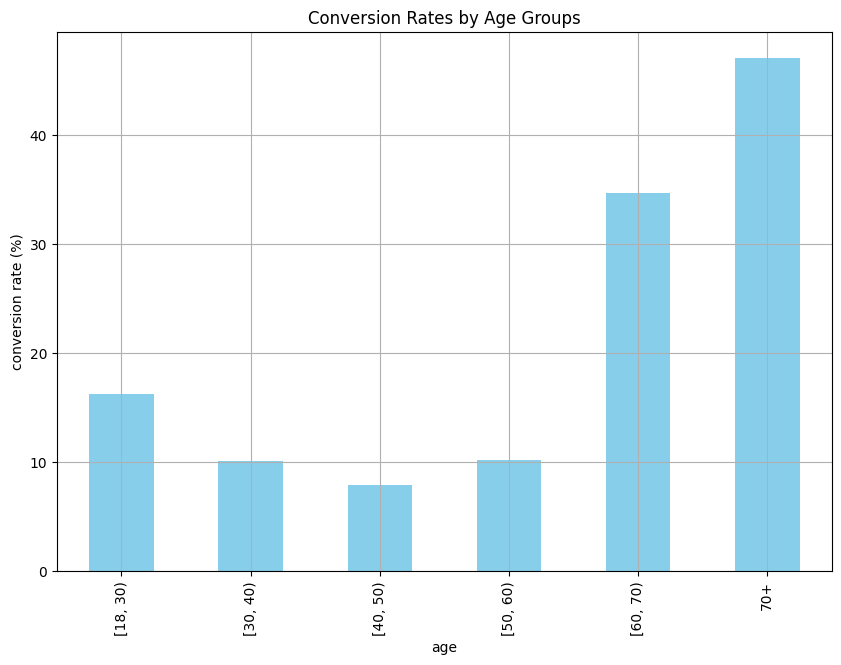

In [ ]:
ax = conversions_by_age_group.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()